#Import packages and import data to dataframe


In [28]:
# installation
! pip install requests

In [29]:
import pandas as pd
# requests for getting data file from Google Sheet link
import requests
# get latest Vietnam SARS-CoV-2 | COVID-19 data
import io
from io import BytesIO
import datetime

# get data from shared Google Sheet
response = requests.get('https://docs.google.com/spreadsheets/u/1/d/1vkvCEkZ8txrTmEldQGAycVVQbBHV-BwqTaCrxNYTtug/export?format=csv&id=1vkvCEkZ8txrTmEldQGAycVVQbBHV-BwqTaCrxNYTtug&gid=453484829')
assert response.status_code == 200, 'Wrong status code'
data = response.content

# import data to dataframe
df = pd.read_csv(BytesIO(data)) #unprocessed data

# print few rows
df.head()

,Date,Case,Gender,Age,Origin,Current Location,Confirmed,Recovered,Death
0,01/23/2020,BN_01,male,66.0,NaN,"Ho Chi Minh City,Vietnam",1,1,NaN
1,01/23/2020,BN_02,male,28.0,NaN,"Ho Chi Minh City,Vietnam",1,1,NaN
2,01/31/2020,BN_03,Female,25.0,NaN,"Thanh Hoa,Vietnam",1,1,NaN
3,01/31/2020,BN_04,male,29.0,NaN,"Vinh Phuc,Vietnam",1,1,NaN
4,01/31/2020,BN_05,Female,23.0,NaN,"Vinh Phuc,Vietnam",1,1,NaN


#Cases per day

In [32]:
df['Date'] =pd.to_datetime(df.Date)
dfDate = df['Date'].value_counts().sort_index()
dfDate

2020-01-23    2
2020-01-31    3
2020-02-01    1
2020-02-02    1
2020-02-03    1
             ..
2020-05-18    4
2020-05-24    1
2020-05-25    1
2020-05-26    1
2020-05-30    1
Name: Date, Length: 63, dtype: int64

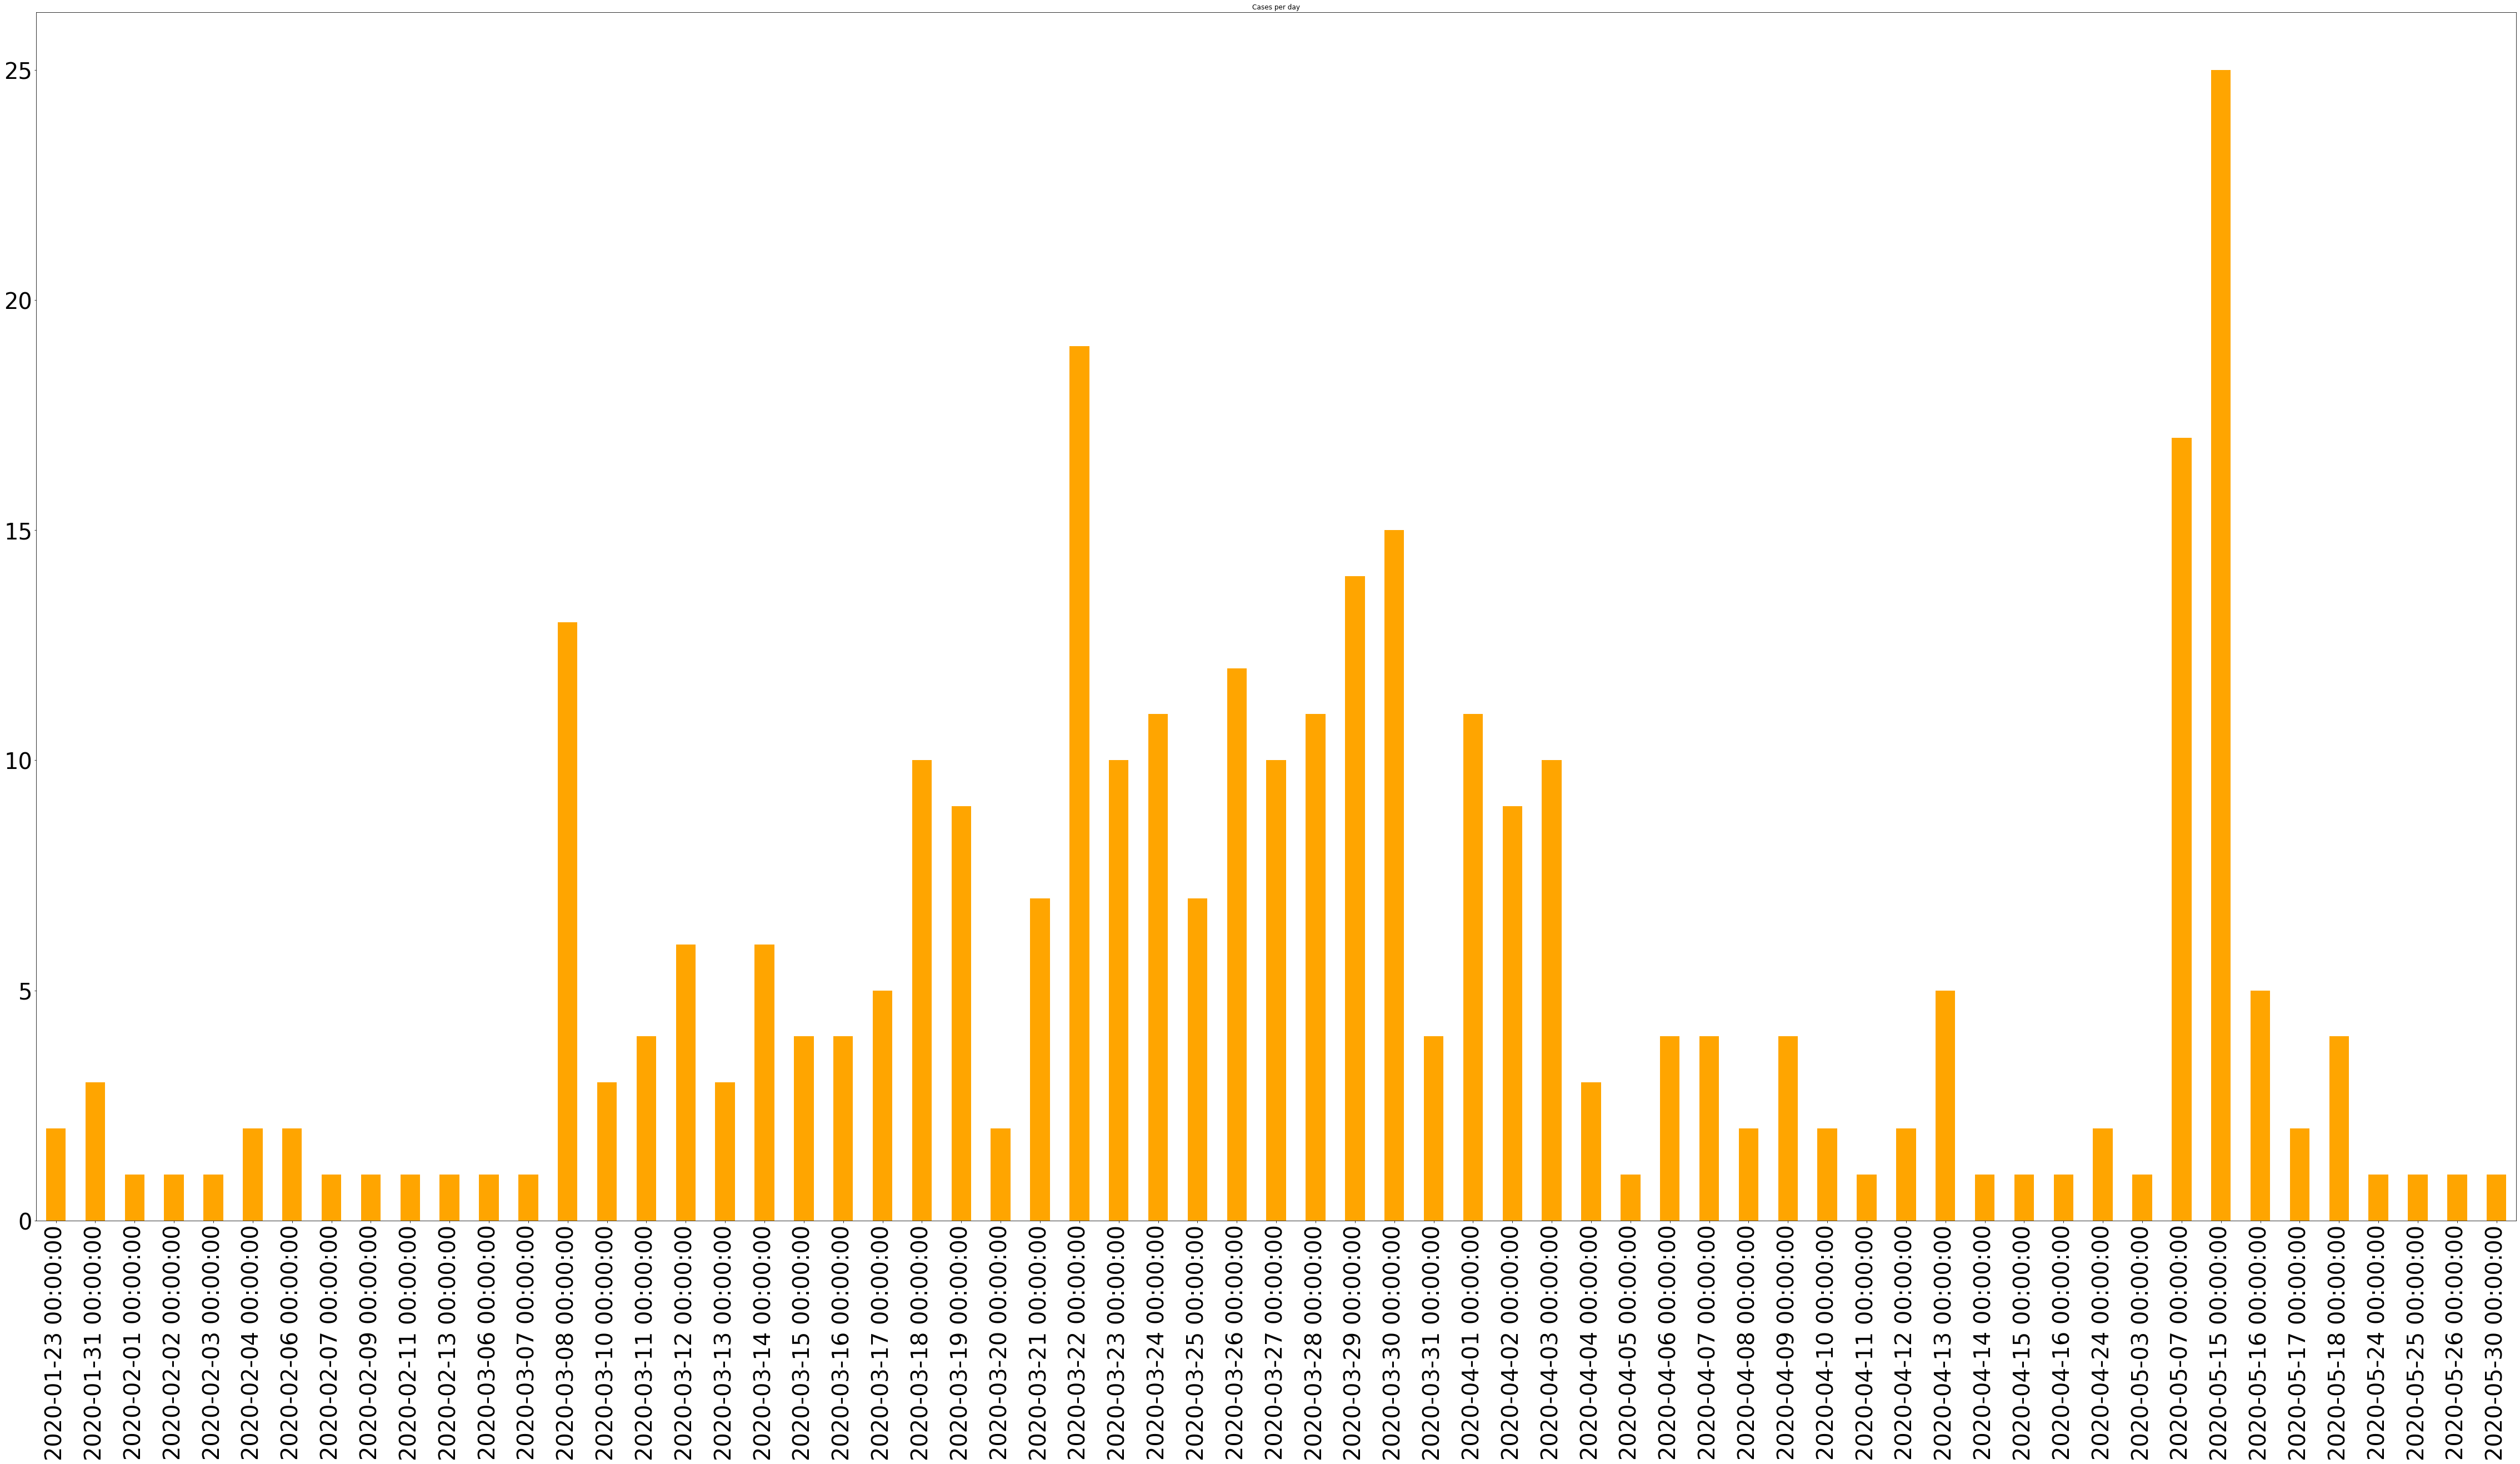

In [31]:
dfDate.plot(kind='bar', color = 'orange', title="Cases per day", figsize=(80,40), fontsize=40)
